# 一、导入数据

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel("input/data_.xlsx",index_col=0)

In [3]:
data_ = data.copy()
data_

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big,Thickness_class,Cell Size
ID,,,,,,,,,,,,,,,,
1275807,4,2,4,3,2,2,2,1,1,2,2,1,0,0,medium,small
1193683,1,1,2,1,3,1,1,1,1,2,1,1,0,0,thin,small
1170419,10,10,10,8,2,10,4,1,1,4,3,0,0,1,thick,big
1190386,4,6,6,5,7,6,7,7,3,4,2,0,1,0,medium,medium
1202125,4,1,1,1,2,1,3,1,1,2,2,1,0,0,medium,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493452,1,1,3,1,2,1,1,1,1,2,1,1,0,0,thin,small
1116132,6,3,4,1,5,2,3,9,1,4,2,1,0,0,medium,small
1133136,3,1,1,1,2,3,3,1,1,2,1,1,0,0,thin,small


In [4]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1275807 to 1206314
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              645 non-null    int64 
 1   Uniformity of Cell Size      645 non-null    int64 
 2   Uniformity of Cell Shape     645 non-null    int64 
 3   Marginal Adhesion            645 non-null    int64 
 4   Single Epithelial Cell Size  645 non-null    int64 
 5   Bare Nuclei                  645 non-null    int64 
 6   Bland Chromatin              645 non-null    int64 
 7   Normal Nucleoli              645 non-null    int64 
 8   Mitoses                      645 non-null    int64 
 9   Class                        645 non-null    int64 
 10  Thickness_classnum           645 non-null    int64 
 11  Cell Size _small             645 non-null    int64 
 12  Cell Size _medium            645 non-null    int64 
 13  Cell Size _big           

# 二、设置变量

In [5]:
features = data_.drop(columns=['Class','Thickness_class','Cell Size'])
features

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big
ID,,,,,,,,,,,,,
1275807,4,2,4,3,2,2,2,1,1,2,1,0,0
1193683,1,1,2,1,3,1,1,1,1,1,1,0,0
1170419,10,10,10,8,2,10,4,1,1,3,0,0,1
1190386,4,6,6,5,7,6,7,7,3,2,0,1,0
1202125,4,1,1,1,2,1,3,1,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493452,1,1,3,1,2,1,1,1,1,1,1,0,0
1116132,6,3,4,1,5,2,3,9,1,2,1,0,0
1133136,3,1,1,1,2,3,3,1,1,1,1,0,0


In [6]:
target = data_.Class.replace(to_replace = [2, 4], value = [0,1])
target

ID
1275807    0
1193683    0
1170419    1
1190386    1
1202125    0
          ..
493452     0
1116132    1
1133136    0
1158247    0
1206314    0
Name: Class, Length: 645, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
transfer = StandardScaler()

In [9]:
features_ = transfer.fit_transform(features)

In [10]:
features_

array([[-0.17231198, -0.39676889,  0.23516391, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.72153531, -0.43303311, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [ 1.93130744,  2.20136243,  2.23975499, ..., -1.60727513,
        -0.47319015,  3.06646797],
       ...,
       [-0.52291521, -0.72153531, -0.76713162, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.72153531, -0.76713162, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.39676889, -0.0989346 , ...,  0.62217102,
        -0.47319015, -0.32610809]])

In [11]:
#features_ = features_[:,:9]

# 三、K-means算法

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca_2 = PCA(n_components=2)

In [14]:
features_2 = pca_2.fit_transform(features_)

In [15]:
features_2.shape

(645, 2)

In [16]:
x=features_2[:,0]
y=features_2[:,1]

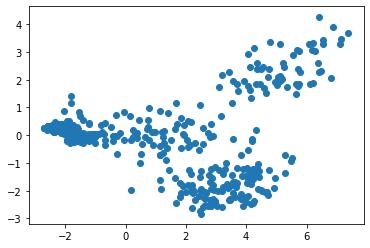

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=3)

In [20]:
y_kmeans = kmeans.fit_predict(features_)

In [21]:
y_kmeans

array([1, 1, 2, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1, 0,
       0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 1,
       1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2, 1,
       1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1,

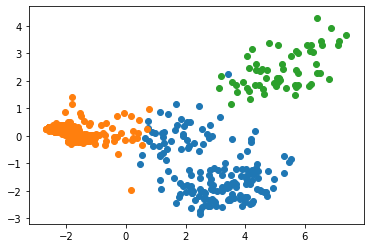

In [22]:
plt.scatter(x[y_kmeans==0],y[y_kmeans==0])
plt.scatter(x[y_kmeans==1],y[y_kmeans==1])
plt.scatter(x[y_kmeans==2],y[y_kmeans==2])
plt.show()

In [23]:
clusters = np.arange(2,11)
clusters

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [24]:
inertia=[]
for i in clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features_)
    inertia.append(kmeans.inertia_)

In [25]:
inertia

[4031.810716019819,
 3111.879936927466,
 2626.0025081288477,
 2356.5710228650205,
 2135.145520214334,
 1987.5506930019365,
 1856.485017733765,
 1786.9668118973,
 1709.898474496401]

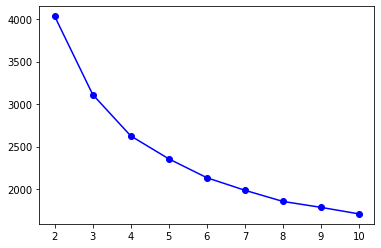

In [26]:
plt.plot(clusters,inertia,"bo-")

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
sil_score=[]
for i in clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features_)
    sil_score.append(silhouette_score(features_,kmeans.labels_))

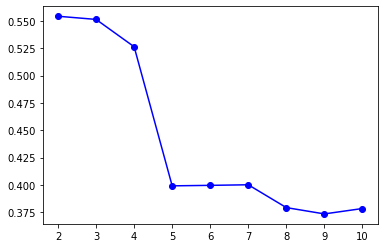

In [29]:
plt.plot(clusters,sil_score,"bo-")

# 四、DBSCN

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
dbscan = DBSCAN()

In [32]:
y_db = dbscan.fit_predict(features_)

In [33]:
y_db

array([-1,  1, -1, -1,  0, -1,  1,  0, -1, -1,  0, -1,  1,  1, -1, -1,  1,
       -1, -1,  1,  1, -1, -1,  0,  1,  1, -1,  1, -1, -1, -1,  1,  0, -1,
        1,  1, -1, -1, -1,  1,  0,  1,  1,  0,  0,  1,  1,  1, -1, -1, -1,
        1,  1,  0,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  0, -1,  1,
        1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1,  1,  0, -1,  1,  1, -1,
        1, -1,  1, -1,  1,  1, -1, -1,  0,  1,  1, -1, -1, -1, -1,  1, -1,
       -1,  1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  1,  1,  1, -1,  1, -1,
       -1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,
       -1,  1, -1, -1, -1, -1, -1,  1,  0,  1, -1, -1,  1, -1, -1, -1, -1,
        0,  0,  0,  1, -1,  1,  1,  0, -1,  1,  1,  0, -1, -1, -1, -1,  0,
       -1, -1,  1, -1,  0, -1,  0,  0,  1, -1, -1, -1,  0, -1,  0, -1, -1,
       -1, -1,  0, -1, -1,  1, -1, -1, -1,  2,  1, -1,  1,  1, -1,  1,  0,
        1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  0,  1, -1, -1, -1, -1, -1,
        0,  1, -1, -1,  1

In [34]:
eps_ = np.linspace(0.5,2,100)

In [35]:
sil_score=[]
for i in eps_:
    dbscan = DBSCAN(eps=i)
    dbscan.fit(features_)
    sil_score.append(silhouette_score(features_,dbscan.labels_))

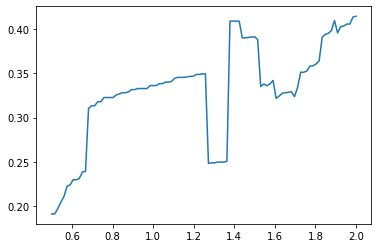

In [36]:
plt.plot(eps_,sil_score)

In [37]:
index_ = np.argmax(sil_score[:80])
best_eps = eps_[index_]
dbscan_ = DBSCAN(eps=best_eps)

In [38]:
y_db_ = dbscan_.fit_predict(features_)

In [39]:
y_db_

array([ 0,  0, -1, -1,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0, -1, -1,  0,
       -1, -1,  0,  0, -1, -1,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0, -1,
        0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0, -1,  0, -1,  0,
        0, -1, -1, -1, -1,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0, -1,
        0, -1,  0, -1,  0,  0, -1, -1,  0,  0,  0,  1, -1, -1, -1,  0, -1,
        0,  0, -1,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0, -1,
       -1, -1, -1,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0, -1,  0,
        0,  0, -1,  1, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1, -1, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1, -1, -1, -1,  0,
       -1, -1,  0, -1,  0, -1,  0,  0,  0, -1, -1,  0,  0, -1,  0, -1, -1,
       -1,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0, -1, -1, -1,  0,  0, -1,  0, -1,  0,  0, -1, -1, -1,  0,  0,
        0,  0, -1, -1,  0

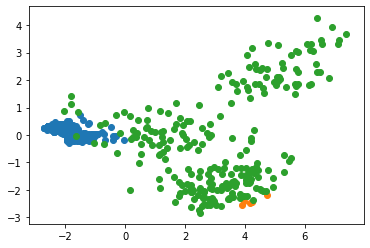

In [40]:
plt.scatter(x[y_db_==0],y[y_db_==0])
plt.scatter(x[y_db_==1],y[y_db_==1])
plt.scatter(x[y_db_==-1],y[y_db_==-1])
plt.show()

# 五、高斯混合模型

In [41]:
from sklearn.mixture import GaussianMixture

In [42]:
gm = GaussianMixture(n_components=3, n_init=10)

In [43]:
y_gm = gm.fit_predict(features_)

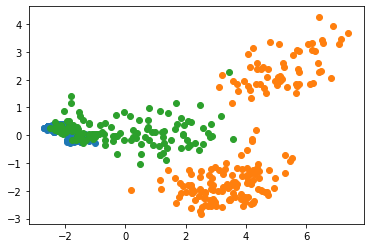

In [44]:
plt.scatter(x[y_gm==0],y[y_gm==0])
plt.scatter(x[y_gm==1],y[y_gm==1])
plt.scatter(x[y_gm==2],y[y_gm==2])
plt.show()

In [45]:
AIC=[]
BIC=[]
for i in clusters:
    gm = GaussianMixture(n_components=i,n_init=10)
    gm.fit(features_)
    AIC.append(gm.aic(features_))
    BIC.append(gm.bic(features_))

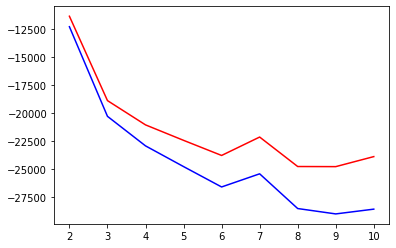

In [46]:
plt.plot(clusters,AIC,'b')
plt.plot(clusters,BIC,'r')

# 六、层次聚类

In [47]:
import seaborn as sns

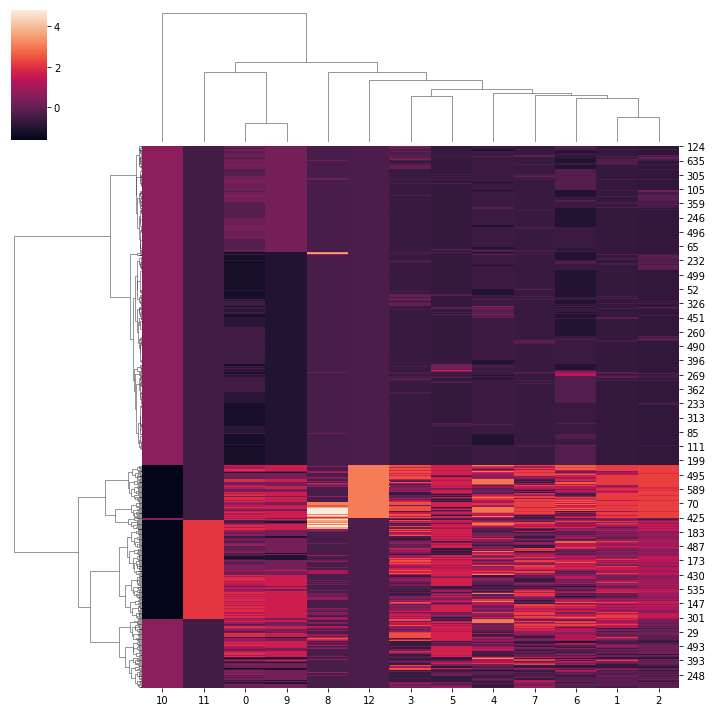

In [48]:
sns.clustermap(features_,method='ward')

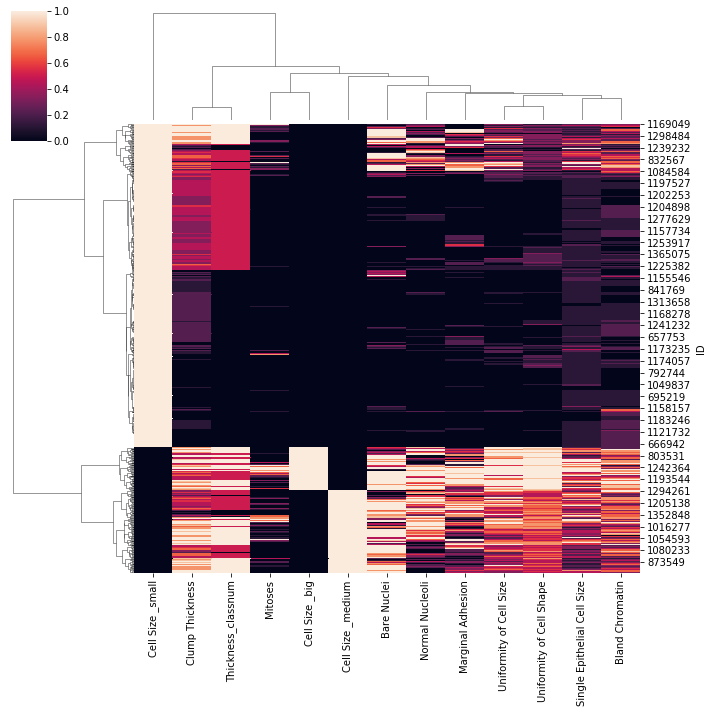

In [49]:
sns.clustermap(features,method='ward',standard_scale=True)

In [50]:
from sklearn.preprocessing import MinMaxScaler
mm_transfer = MinMaxScaler()
features_minmax = mm_transfer.fit_transform(features)

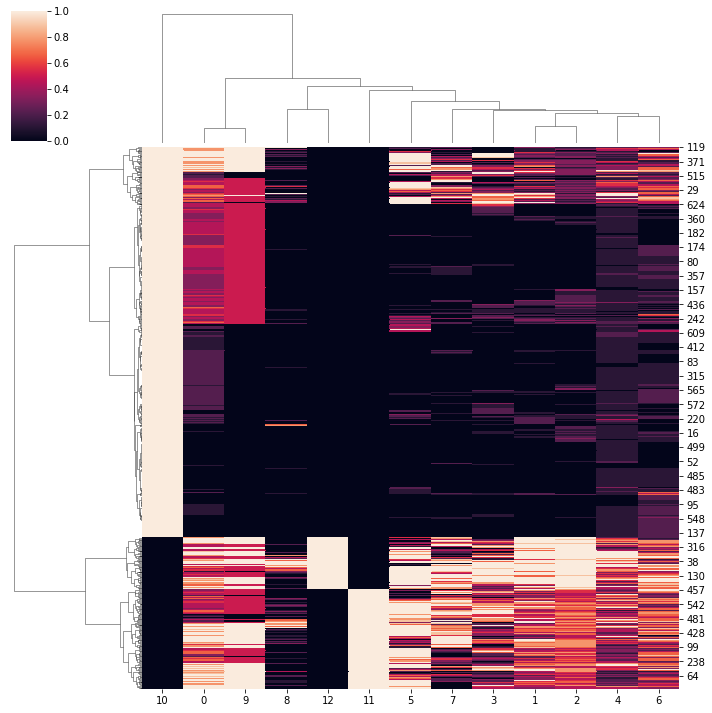

In [51]:
sns.clustermap(features_minmax,method='ward')

In [52]:
from sklearn.cluster import AgglomerativeClustering

In [53]:
aggcluster = AgglomerativeClustering(n_clusters=4,linkage='ward')

In [54]:
y_agg = aggcluster.fit_predict(features_minmax)

In [55]:
y_agg

array([0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1,
       3, 0, 0, 0, 2, 0, 0, 3, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 1, 0,
       3, 0, 0, 3, 2, 1, 3, 0, 3, 2, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 1, 0,
       3, 0, 0, 1, 3, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 3, 0, 1, 0, 0, 3,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 3, 3, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       1, 0, 1, 0, 0, 0, 3, 1, 2, 3, 3, 0, 0, 0, 1, 1, 0, 0, 3, 3, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 3, 0, 2, 1, 0, 1, 0, 3,
       0, 0, 0, 1, 3, 0, 0, 1, 0, 3, 3, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 3, 0, 3, 0, 0, 3, 2, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 3, 0, 0, 3, 0,
       0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 3, 0, 0, 1, 0, 2, 0,
       0, 0, 2, 3, 3, 2, 0, 3, 0, 0, 0, 3, 3, 0, 0,

# 七、简单应用

In [56]:
data_[y_agg==0].describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.0,396.0,396.0
mean,2.866162,1.214646,1.351010,1.280303,1.994949,1.280303,2.040404,1.126263,1.070707,2.030303,1.358586,1.0,0.0,0.0
std,1.616299,0.570931,0.732966,0.711366,0.492963,0.905519,0.995374,0.443481,0.537270,0.244620,0.480192,0.0,0.0,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.0,0.0
25%,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.0,0.0
50%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.0,0.0
75%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.0,0.0,0.0
max,7.000000,4.000000,4.000000,6.000000,5.000000,10.000000,7.000000,4.000000,8.000000,4.000000,2.000000,1.0,0.0,0.0


In [57]:
data_[y_agg==1].describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.0,118.0,118.0
mean,6.991525,6.152542,6.423729,5.169492,4.966102,7.440678,5.779661,5.745763,2.211864,3.864407,2.389831,0.0,1.0,0.0
std,2.489279,2.082188,1.127790,2.844413,2.187502,3.147492,2.088371,3.300315,2.179358,0.504937,0.654164,0.0,0.0,0.0
min,1.000000,3.000000,5.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.0,1.0,0.0
25%,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,4.000000,3.000000,1.000000,4.000000,2.000000,0.0,1.0,0.0
50%,7.000000,6.000000,6.000000,5.000000,4.000000,9.000000,6.000000,6.000000,1.000000,4.000000,2.000000,0.0,1.0,0.0
75%,10.000000,8.000000,7.000000,8.000000,6.000000,10.000000,7.000000,9.000000,3.000000,4.000000,3.000000,0.0,1.0,0.0
max,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,3.000000,0.0,1.0,0.0


In [58]:
data_[y_agg==2].describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.0,62.0,62.0
mean,7.677419,9.225806,9.887097,6.951613,6.774194,7.693548,6.951613,7.306452,3.500000,4.0,2.580645,0.0,0.0,1.0
std,2.117640,1.508656,0.319058,3.174837,2.418639,3.272282,2.335944,3.242083,3.263057,0.0,0.529410,0.0,0.0,0.0
min,2.000000,4.000000,9.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,4.0,1.000000,0.0,0.0,1.0
25%,5.250000,9.250000,10.000000,4.000000,5.000000,5.000000,5.000000,5.000000,1.000000,4.0,2.000000,0.0,0.0,1.0
50%,8.000000,10.000000,10.000000,8.000000,6.000000,10.000000,7.000000,9.000000,1.500000,4.0,3.000000,0.0,0.0,1.0
75%,10.000000,10.000000,10.000000,10.000000,9.750000,10.000000,8.000000,10.000000,5.750000,4.0,3.000000,0.0,0.0,1.0
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.0,3.000000,0.0,0.0,1.0


In [59]:
data_[y_agg==3].describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.0,69.0,69.0
mean,6.681159,4.333333,3.188406,4.739130,4.652174,6.739130,4.971014,4.942029,2.057971,3.652174,2.289855,1.0,0.0,0.0
std,2.637360,2.459475,0.974308,3.471108,2.299783,3.612284,2.202746,2.999432,1.908834,0.763623,0.709214,0.0,0.0,0.0
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.0,0.0
25%,5.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,1.000000,4.000000,2.000000,1.0,0.0,0.0
50%,7.000000,4.000000,3.000000,4.000000,4.000000,9.000000,5.000000,5.000000,1.000000,4.000000,2.000000,1.0,0.0,0.0
75%,9.000000,6.000000,4.000000,8.000000,6.000000,10.000000,7.000000,8.000000,3.000000,4.000000,3.000000,1.0,0.0,0.0
max,10.000000,10.000000,4.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,3.000000,1.0,0.0,0.0
